In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn
import random

random.seed(12345)

In [2]:
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv')
Xtest = np.loadtxt('Xtest.csv')

In [3]:
print('There are', Xtrain.shape[0], 'training examples')
print('There are', Xtest.shape[0], 'test examples')

There are 3000 training examples
There are 3000 test examples


Text(0.5, 1.0, 'Class +1 Example 10')

<Figure size 432x288 with 0 Axes>

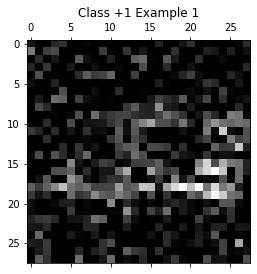

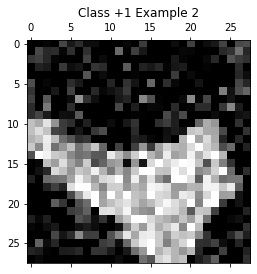

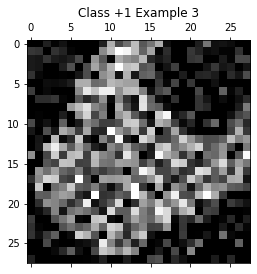

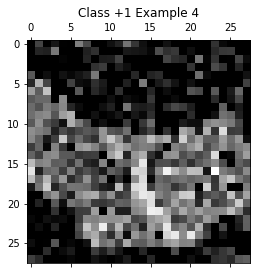

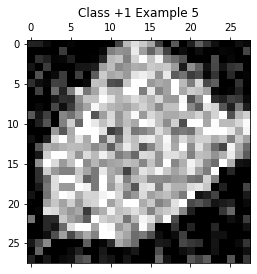

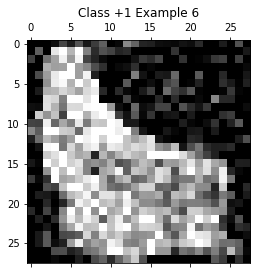

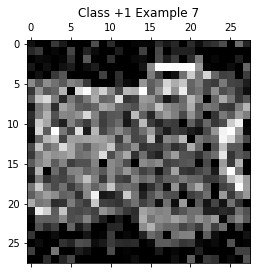

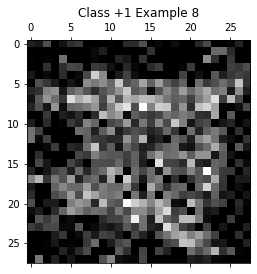

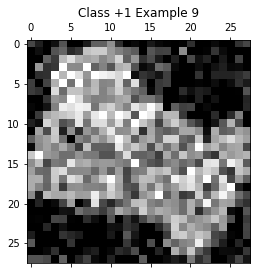

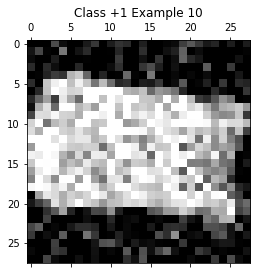

In [4]:
idx_class_neg1 = ( Ytrain == -1) # index for -1 class
idx_class_pos1 = ( Ytrain == +1) # index for +1 class

Xtrain_pos1 = Xtrain[idx_class_pos1, ] #all +1 class training examples
Xtrain_neg1 = Xtrain[idx_class_neg1, ] #all -1 class training examples
Ytrain_pos1 = Ytrain[idx_class_pos1, ] #all +1 class training labels
Ytrain_neg1 = Ytrain[idx_class_neg1, ] #all -1 class training labels

idx_pos1 = list(range(len(Ytrain_pos1)))
idx_neg1 = list(range(len(Ytrain_neg1)))
random.shuffle(idx_pos1) # Just shuffle the data for positive classes
random.shuffle(idx_neg1) # Just shuffle the data for positive classes
Xtrain_pos1_random, Ytrain_pos1_random = Xtrain_pos1[idx_pos1,:], Ytrain_pos1[idx_pos1] #randomly shuffled positive class
                                                                                        #training examples
Xtrain_neg1_random, Ytrain_neg1_random = Xtrain_neg1[idx_neg1,:], Ytrain_neg1[idx_neg1] #randomly shuffled negative class
                                                                                        #training examples
plt.gray();plt.matshow(Xtrain_pos1_random[0].reshape((28, 28)));plt.title('Class +1 Example 1')
plt.gray();plt.matshow(Xtrain_pos1_random[1].reshape((28, 28)));plt.title('Class +1 Example 2') 
plt.gray();plt.matshow(Xtrain_pos1_random[2].reshape((28, 28)));plt.title('Class +1 Example 3') 
plt.gray();plt.matshow(Xtrain_pos1_random[3].reshape((28, 28)));plt.title('Class +1 Example 4') 
plt.gray();plt.matshow(Xtrain_pos1_random[4].reshape((28, 28)));plt.title('Class +1 Example 5')  
plt.gray();plt.matshow(Xtrain_pos1_random[5].reshape((28, 28)));plt.title('Class +1 Example 6') 
plt.gray();plt.matshow(Xtrain_pos1_random[6].reshape((28, 28)));plt.title('Class +1 Example 7') 
plt.gray();plt.matshow(Xtrain_pos1_random[7].reshape((28, 28)));plt.title('Class +1 Example 8')  
plt.gray();plt.matshow(Xtrain_pos1_random[8].reshape((28, 28)));plt.title('Class +1 Example 9') 
plt.gray();plt.matshow(Xtrain_pos1_random[9].reshape((28, 28)));plt.title('Class +1 Example 10') 

Text(0.5, 1.0, 'Class -1 Example 10')

<Figure size 432x288 with 0 Axes>

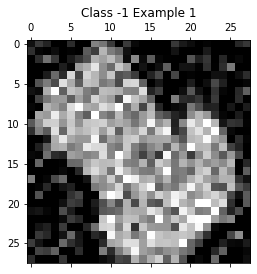

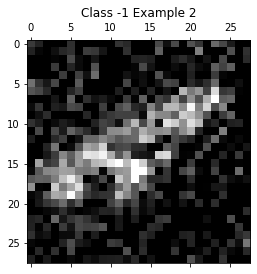

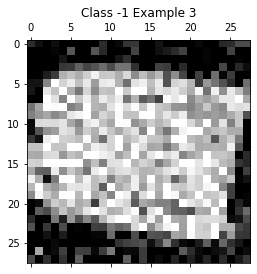

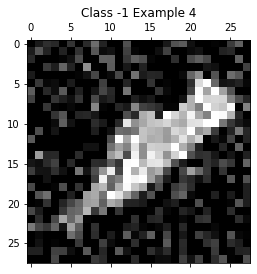

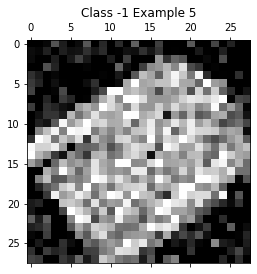

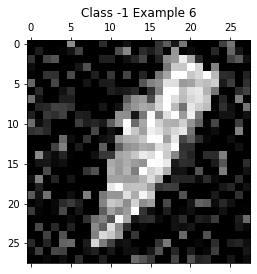

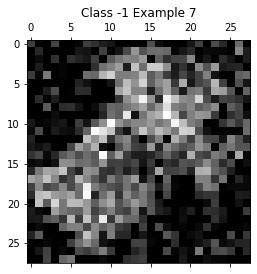

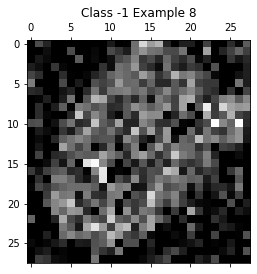

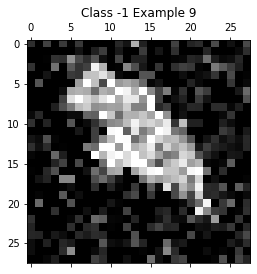

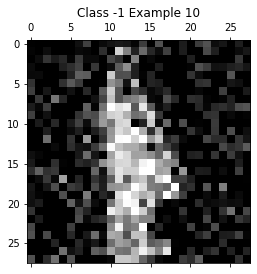

In [5]:
plt.gray();plt.matshow(Xtrain_neg1_random[0].reshape((28, 28)));plt.title('Class -1 Example 1')
plt.gray();plt.matshow(Xtrain_neg1_random[1].reshape((28, 28)));plt.title('Class -1 Example 2') 
plt.gray();plt.matshow(Xtrain_neg1_random[2].reshape((28, 28)));plt.title('Class -1 Example 3') 
plt.gray();plt.matshow(Xtrain_neg1_random[3].reshape((28, 28)));plt.title('Class -1 Example 4') 
plt.gray();plt.matshow(Xtrain_neg1_random[4].reshape((28, 28)));plt.title('Class -1 Example 5')  
plt.gray();plt.matshow(Xtrain_neg1_random[5].reshape((28, 28)));plt.title('Class -1 Example 6') 
plt.gray();plt.matshow(Xtrain_neg1_random[6].reshape((28, 28)));plt.title('Class -1 Example 7') 
plt.gray();plt.matshow(Xtrain_neg1_random[7].reshape((28, 28)));plt.title('Class -1 Example 8')  
plt.gray();plt.matshow(Xtrain_neg1_random[8].reshape((28, 28)));plt.title('Class -1 Example 9') 
plt.gray();plt.matshow(Xtrain_neg1_random[9].reshape((28, 28)));plt.title('Class -1 Example 10')

In [6]:
print('There are', len(Ytrain_pos1), 'positive training examples.')
print('There are', len(Ytrain_neg1), 'negative training examples.')

There are 2118 positive training examples.
There are 882 negative training examples.


# Question 2

In [7]:
def accuracy(Ytest,Ypred): #defining accuracy metric
    # to do: calculate accuracy
    # input:
    # Ytest: nx1 vector of labels (true)
    # Ypred: nx1 vector of labels (predicted)
    if len(Ytest) != len(Ypred):
        warnings.warn("Vectors not of same length. Unable to calculate accuracy.")
        return
    else:
        t = (sum(Ypred == Ytest)) / len(Ytest)
    return t #dummy return

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score

#sorted(sklearn.metrics.SCORERS.keys()) ones I can use in cross_val_score

sknn = KNeighborsClassifier(n_neighbors=1)
skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For untransformed data with KNN, K=1:')
for f in range(0,5):
#     print(f)
    print("Fold %0.0f: Accuracy is %0.3f, ROC is %0.3f, PR is %0.3f" % (f+1, acc[f], roc[f], pr[f]))
print('')

print("%0.3f average Accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f average ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f average PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For untransformed data with KNN, K=1:
Fold 1: Accuracy is 0.758, ROC is 0.734, PR is 0.824
Fold 2: Accuracy is 0.757, ROC is 0.731, PR is 0.822
Fold 3: Accuracy is 0.758, ROC is 0.723, PR is 0.817
Fold 4: Accuracy is 0.753, ROC is 0.725, PR is 0.817
Fold 5: Accuracy is 0.738, ROC is 0.708, PR is 0.807

0.753 average Accuracy with a standard deviation of 0.008
0.724 average ROC with a standard deviation of 0.009
0.818 average PR with a standard deviation of 0.006


In [9]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

sknn = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For standardised data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For standardised data with KNN, K=1:
0.750 accuracy with a standard deviation of 0.016
0.718 ROC with a standard deviation of 0.019
0.814 PR with a standard deviation of 0.011


In [10]:
sknn = make_pipeline(preprocessing.MinMaxScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For Min-Max Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For Min-Max Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.817 PR with a standard deviation of 0.006


In [11]:
sknn = make_pipeline(preprocessing.MaxAbsScaler(), KNeighborsClassifier(n_neighbors=1))
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change

print('For Max Abs Scaled data with KNN, K=1:')
print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))

For Max Abs Scaled data with KNN, K=1:
0.753 accuracy with a standard deviation of 0.009
0.724 ROC with a standard deviation of 0.010
0.817 PR with a standard deviation of 0.006


Mean transformations make no difference, try others (see lectures). Finding optimal K:

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, average_precision_score
best_acc = [0,0]
best_roc = [0,0]
best_pr = [0,0]
#sorted(sklearn.metrics.SCORERS.keys()) ones I can use in cross_val_score
for k in range(1, 11):
    sknn = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)
    acc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf)
    roc = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'roc_auc') #auc roc
    pr = cross_val_score(sknn, Xtrain, Ytrain, cv=skf, scoring = 'average_precision') #auc pr I think but can change
    
    if best_acc[0] < acc.mean():
        best_acc[0] = acc.mean()
        best_acc[1] = k
        
    if best_roc[0] < roc.mean():
        best_roc[0] = roc.mean()
        best_roc[1] = k
        
    if best_pr[0] < pr.mean():
        best_pr[0] = pr.mean()
        best_pr[1] = k

    print('For untransformed data with KNN, K=',k)
    print("%0.3f accuracy with a standard deviation of %0.3f" % (acc.mean(), acc.std()))
    print("%0.3f ROC with a standard deviation of %0.3f" % (roc.mean(), roc.std()))
    print("%0.3f PR with a standard deviation of %0.3f" % (pr.mean(), pr.std()))
    print('')

For untransformed data with KNN, K= 1
0.753 accuracy with a standard deviation of 0.008
0.724 ROC with a standard deviation of 0.009
0.818 PR with a standard deviation of 0.006

For untransformed data with KNN, K= 2
0.690 accuracy with a standard deviation of 0.011
0.760 ROC with a standard deviation of 0.008
0.844 PR with a standard deviation of 0.005

For untransformed data with KNN, K= 3
0.758 accuracy with a standard deviation of 0.009
0.778 ROC with a standard deviation of 0.007
0.859 PR with a standard deviation of 0.006

For untransformed data with KNN, K= 4
0.729 accuracy with a standard deviation of 0.006
0.788 ROC with a standard deviation of 0.006
0.867 PR with a standard deviation of 0.006

For untransformed data with KNN, K= 5
0.761 accuracy with a standard deviation of 0.009
0.789 ROC with a standard deviation of 0.008
0.871 PR with a standard deviation of 0.007

For untransformed data with KNN, K= 6
0.744 accuracy with a standard deviation of 0.008
0.785 ROC with a stand

# Question 3

In [13]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

# svm = SVC()

# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear',  'precomputed']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001, 'scale', 'auto'], 'kernel': ['rbf', 'sigmoid', 'poly']},
#  ]
# search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=skf, refit=True)
# result = search.fit(Xtrain, Ytrain)
# best_model = result.best_estimator_

# # 	# define search space
# # 	space = dict()
# # 	space['n_estimators'] = [10, 100, 500]
# # 	space['max_features'] = [2, 4, 6]
# # 	# define search
# # 	search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
# # 	# execute search
# # 	result = search.fit(X_train, y_train)
# # 	# get the best performing model fit on the whole training set
# # 	best_model = result.best_estimator_
# # 	# evaluate model on the hold out dataset
# # 	yhat = best_model.predict(X_test)
# # 	# evaluate the model
# # 	acc = accuracy_score(y_test, yhat)
# best_model

# Question 4

The data dimensions are (3000, 2) (3000,)


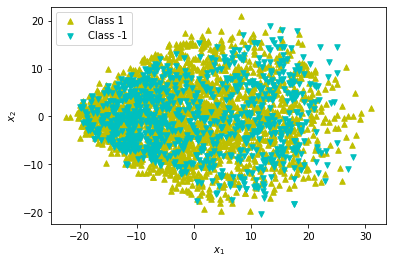

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#first standardise the data 

Xtrain_std_scale = preprocessing.StandardScaler().fit_transform(Xtrain)
#     Xtrain_cv_std_scale = std_scale.transform(Xtrain_cv)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)


plt.scatter(Xtrain_PCA[Ytrain==1,0],Xtrain_PCA[Ytrain==1,1],marker = '^', c = 'y', s = 30, label = 'Class 1')
plt.scatter(Xtrain_PCA[Ytrain==-1,0],Xtrain_PCA[Ytrain==-1,1],marker = 'v',c = 'c', s = 30, label = 'Class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')        
plt.legend(loc = 'upper left')
print('The data dimensions are',Xtrain_PCA.shape, Ytrain.shape)

Clearly no linear seperability when the number of dimensions is reduced to 2

In [23]:
sum(pca.explained_variance_ratio_) # ~22% of variance explained by first 2 principal components

0.2171369259332871

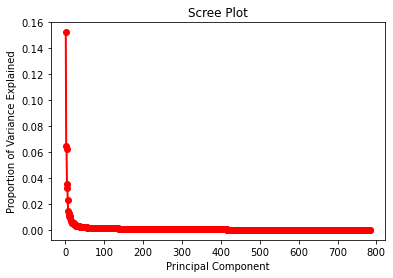

In [41]:
#scree plot of 20 Principal components
pca = PCA(n_components=Xtrain.shape[1])

#first standardise the data 

Xtrain_std_scale = preprocessing.StandardScaler().fit_transform(Xtrain)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [50]:
out_sum = 0
c = 0

while out_sum < 0.95:
    c += 1
    pca = PCA(n_components=c)
    Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)
    out_sum = np.sum(pca.explained_variance_ratio_)  


print('%0.0f components results in %0.2f of explained variance' % (c, out_sum))
    

534 components results in 0.95 of explained variance


In [ ]:
pca = PCA(n_components = 534)
Xtrain_PCA = pca.fit_transform(Xtrain_std_scale)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, random_state = 42, shuffle = True)

svm = SVC()

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'sigmoid', 'poly']},
 ]
search = GridSearchCV(svm, param_grid, scoring='accuracy', cv=skf, refit=True)
result = search.fit(Xtrain_PCA, Ytrain)
best_model = result.best_estimator_

best_model